In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:>

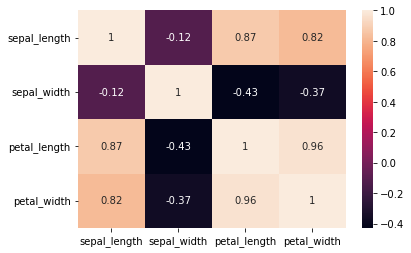

In [3]:
sns.heatmap(data.corr(),annot=True)

In [4]:
x=data.iloc[:,[0,1]]
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0, 0.5, 'sepal_width')

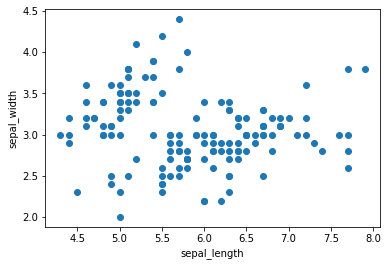

In [5]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')


In [6]:
from  sklearn.cluster import MiniBatchKMeans
 
km = MiniBatchKMeans(n_clusters=3,random_state=0,batch_size=100)    

y_pred = km.fit_predict(x)
y_pred

C:\Users\91799\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [7]:
x['Cluster'] = y_pred
x

C:\Users\91799\AppData\Local\Temp\ipykernel_592\2222826610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = y_pred


,sepal_length,sepal_width,Cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


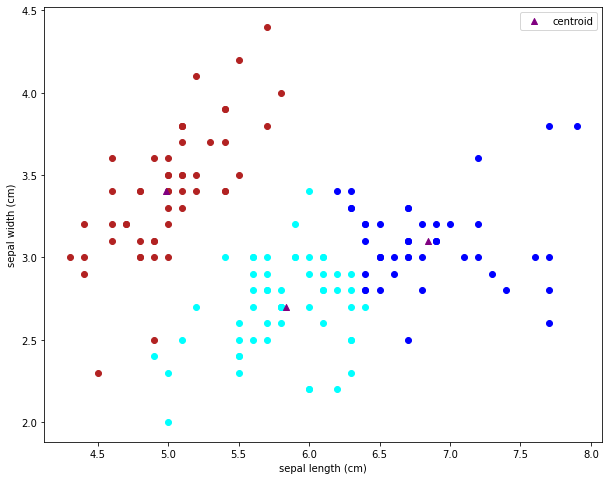

In [8]:
fig=plt.figure(figsize=(10,8))

df1 = x[ x.Cluster==0]
df2 = x[ x.Cluster==1]
df3 = x[ x.Cluster==2]

plt.scatter(df1['sepal_length'],df1['sepal_width'],color='cyan')
plt.scatter(df2['sepal_length'],df2['sepal_width'],color='blue')
plt.scatter(df3['sepal_length'],df3['sepal_width'],color='firebrick')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='^',label='centroid')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()